In [3]:
import pandas as pd
import warnings

# 嘗試不同編碼讀取，遇到格式錯誤自動跳過異常行
def read_csv_auto(path):
    for enc in ["utf-8-sig", "utf-8", "cp950", "big5", "latin-1"]:
        try:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                df = pd.read_csv(path, encoding=enc, on_bad_lines='skip')
            print(f"成功讀取，使用編碼: {enc}")
            return df, enc
        except Exception as e:
            print(f"嘗試 {enc} 失敗: {e}")
    raise ValueError("無法讀取 CSV，請確認檔案編碼")

# SNP 對應表
SNP_MAP = {
    "BDNFgene": {2: 0, 8: 1, 7: 2},
    "GNB3":     {2: 0, 1: 1, 3: 2},
    "HTR2A":    {4: 0, 5: 1, 6: 2},
    "HTR1A":    {6: 0, 2: 1, 8: 2},
    "IL1B":     {4: 0, 6: 1, 5: 2},
    "TPH1":     {7: 0, 6: 1, 3: 2},
    "SLC6A4":   {4: 0, 5: 1, 6: 2},
    "OXTR":     {0: 0, 1: 1, 2: 2},
}

# 讀取資料
df, used_enc = read_csv_auto("20210115for ML analysis demorgraphic_remission補平均.csv")
print(f"資料行數: {len(df)}")

# 轉換 SNP
for col, mapping in SNP_MAP.items():
    if col in df.columns:
        df[col + "_raw"] = df[col]
        df[col] = df[col].map(mapping)

# 輸出結果
df.to_csv("converted_snps.csv", index=False, encoding="utf-8-sig")
print("轉換完成，輸出檔案：converted_snps.csv")

嘗試 utf-8-sig 失敗: 'utf-8' codec can't decode bytes in position 15-16: invalid continuation byte
嘗試 utf-8 失敗: 'utf-8' codec can't decode bytes in position 0-1: invalid continuation byte
嘗試 cp950 失敗: 'cp950' codec can't decode byte 0xee in position 15: illegal multibyte sequence
嘗試 big5 失敗: 'big5' codec can't decode byte 0xee in position 15: illegal multibyte sequence
成功讀取，使用編碼: latin-1
資料行數: 200
轉換完成，輸出檔案：converted_snps.csv


In [11]:
import pandas as pd
import warnings

# 嘗試不同編碼讀取，遇到格式錯誤自動跳過異常行
def read_csv_auto(path):
    for enc in ["utf-8-sig", "utf-8", "cp950", "big5", "latin-1"]:
        try:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                df = pd.read_csv(path, encoding=enc, on_bad_lines='skip')
            print(f"成功讀取，使用編碼: {enc}")
            return df, enc
        except Exception as e:
            print(f"嘗試 {enc} 失敗: {e}")
    raise ValueError("無法讀取 CSV，請確認檔案編碼")

# 讀取資料並顯示前 5 行
df, used_enc = read_csv_auto("20210115for ML analysis demorgraphic_remission補平均.csv")
print(df.head())

# SNP 對應表
SNP_MAP = {
    "BDNFgene": {2: 0, 1: 1, 3: 2},
    "GNB3":     {2: 0, 1: 1, 3: 2},
    "HTR2A":    {6: 0, 5: 1, 4: 2},
    "HTR1A":    {6: 0, 8: 1, 2: 2},
    "IL1B":     {4: 0, 5: 1, 6: 2},
    "TPH1":     {6: 0, 7: 1, 3: 2},
    "SLC6A4":   {4: 0, 5: 1, 6: 2},
    "OXTR":     {2: 0, 1: 1, 0: 2},
}

# 轉換 SNP
for col, mapping in SNP_MAP.items():
    if col in df.columns:
        df[col + "_raw"] = df[col]
        df[col] = df[col].map(mapping)

# 顯示轉換後前 5 行
print(df.head())

# 存成 CSV
df.to_csv("converted_snps.csv", index=False, encoding="utf-8-sig")
print("已存成 converted_snps.csv")

成功讀取，使用編碼: utf-8-sig
  res_no_1  age  sex   BH  BW    BMI  SBP  DBP  ACsugar_LOCF  Insulin_LOCF  \
0  D07A006   23    0  160  45  17.58   97   67          81.0          3.53   
1  D07A015   52    1  175  78  25.47  129   87          96.1          3.19   
2  D07A016   50    1  163  66  24.84  125   80         103.0         11.80   
3  D07A018   24    1  162  62  23.62  153   97          83.0          4.85   
4  D07A020   31    1  166  75  27.22  121   82         104.0          9.09   

   ...  SLC6A4  SLC6A4.1  OXTR  OXTR.1  ftt_r_LOCF  ftt_l_LOCF  pers_err_LOCF  \
0  ...       4        AA     0      AA       39.20       44.00           5.00   
1  ...       4        AA     2      GG       38.44       38.02          18.82   
2  ...       4        AA     0      AA       38.44       38.02          18.82   
3  ...       4        AA     0      AA       38.44       38.02          18.82   
4  ...       4        AA     2      GG       50.00       44.40           6.00   

   cacmplt_LOCF  d_a_LO

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 讀取資料
df = pd.read_csv("converted_snps.csv", encoding="utf-8-sig")

# 設定 y 與 X
y = df['remissionv41_LOCF']
X = df.drop(columns=['remissionv41_LOCF'])

# 將所有欄位轉成數值型別（int 或 float）
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# 分割訓練/測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立 LightGBM 資料集
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# 設定參數
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'seed': 42
}

# 訓練模型（用 callbacks 方式 early stopping）
bst = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    num_boost_round=100,
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
    )

# 預測
y_pred = bst.predict(X_test)
y_pred_label = (y_pred > 0.5).astype(int)

# 準確率
acc = accuracy_score(y_test, y_pred_label)
print(f'測試集準確率: {acc:.4f}')

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_error: 0
測試集準確率: 1.0000


資料欄位: ['res_no_1', 'age', 'sex', 'BH', 'BW', 'BMI', 'SBP', 'DBP', 'ACsugar_LOCF', 'Insulin_LOCF', 'HbA1c_LOCF', 'Cpeptide_LOCF', 'HOMAIR_LOCF', 'HOMAb_LOCF', 'd1_corti_LOCF', 'leptin_3_LOCF', 'Chol_LOCF', 'TG_LOCF', 'HDL_LOCF', 'LDL_LOCF', 'LDL_HDL_LOCF', 'oxytocin_LOCF', 'hsCRP_LOCF', 'HAMD_V1_LOCF', 'HAMD_V4_LOCF', 'whoqol28_ov', 'whoqol28_ph', 'whoqol28_ps', 'whoqol28_sr', 'whoqol28_en', 'whoqol28_s', 'SSS.ia_s', 'SSS.ib_s', 'SSS.iia_s', 'SSS.iib_s', 'sss_sum', 'les_e_s', 'responderv41_LOCF', 'remissionv41_LOCF', 'edu_year', 'Drug', 'BDNFgene', 'BDNFgene.1', 'GNB3', 'GNB3.1', 'HTR2A', 'HTR2A.1', 'HTR1A', 'HTR1A.1', 'IL1B', 'IL1B.1', 'TPH1', 'TPH1.1', 'SLC6A4', 'SLC6A4.1', 'OXTR', 'OXTR.1', 'ftt_r_LOCF', 'ftt_l_LOCF', 'pers_err_LOCF', 'cacmplt_LOCF', 'd_a_LOCF', 'd_b_LOCF', 'BDNFgene_raw', 'GNB3_raw', 'HTR2A_raw', 'HTR1A_raw', 'IL1B_raw', 'TPH1_raw', 'SLC6A4_raw', 'OXTR_raw']
訓練特徵數: 70
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iter

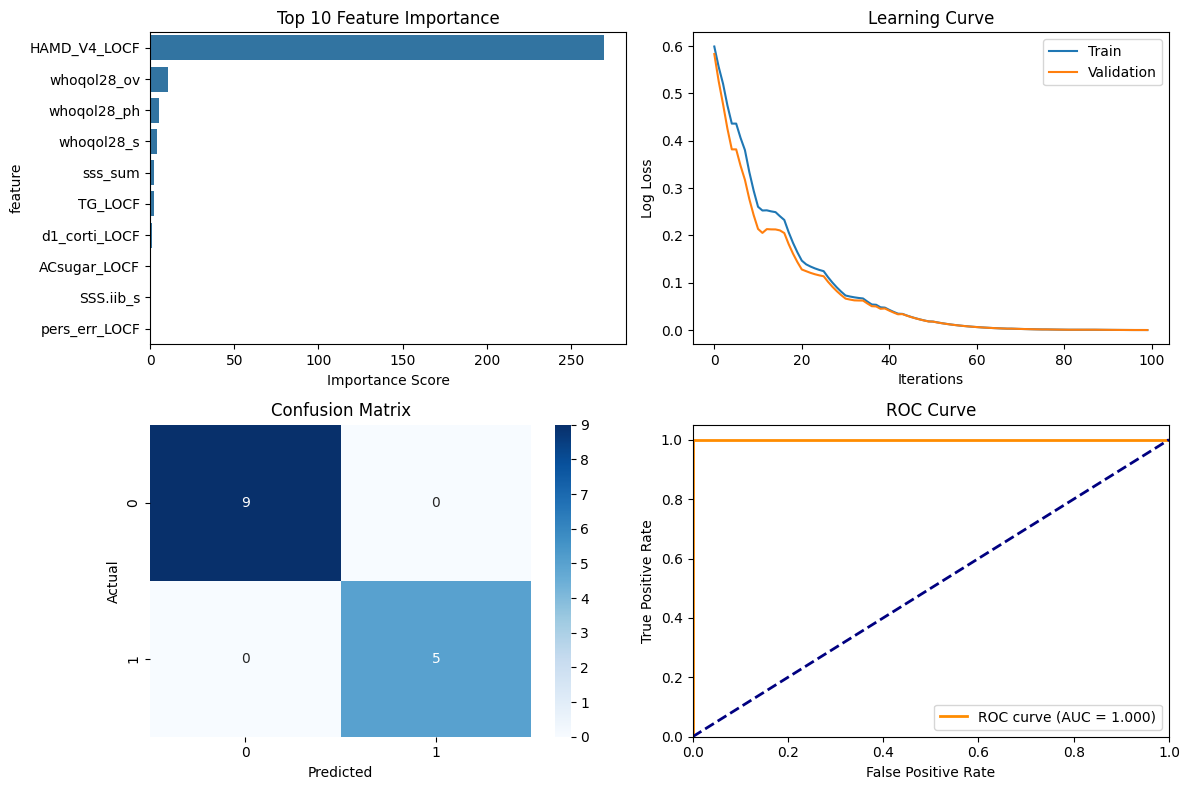


=== 十折交叉驗證結果 ===
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 7.10397e-05
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 8.1597e-05
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.000136548
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 9.21592e-05
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.000150675
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.000131167
Training until validation scores don't improve for 10 rounds
Did 

In [28]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report
import numpy as np

# 讀取資料
df = pd.read_csv("converted_snps.csv", encoding="utf-8-sig")

# 檢查是否有高度相關的特徵（例如 responderv41_LOCF）
print("資料欄位:", df.columns.tolist())
# print("各欄位 shape:")
# for col in df.columns:
#     print(f"{col}: {df[col].shape}")
# print("\n檢查可能的過度擬合特徵...")

# 設定 y 與 X
y = df['remissionv41_LOCF']
X = df.drop(columns=['remissionv41_LOCF'])

print(f"訓練特徵數: {X.shape[1]}")

# 將所有欄位轉成數值型別
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# 處理缺失值
X = X.fillna(X.mean())

# 分割訓練/測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 建立 LightGBM 資料集，記錄訓練過程
evals_result = {}
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# 設定參數
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'seed': 42,
    'learning_rate': 0.1,
    'num_leaves': 15,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5
}

# 訓練模型並記錄 loss
bst = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, test_data],
    valid_names=['train', 'eval'],
    num_boost_round=100,
    callbacks=[lgb.early_stopping(stopping_rounds=10), lgb.record_evaluation(evals_result)]
)

# === 1. 特徵重要性分析 ===
plt.figure(figsize=(12, 8))
feature_importance = bst.feature_importance(importance_type='gain')
feature_names = X.columns
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

plt.subplot(2, 2, 1)
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance Score')

# === 2. 學習曲線 (Loss Curve) ===
plt.subplot(2, 2, 2)
epochs = len(evals_result['train']['binary_logloss'])
x_axis = range(epochs)
plt.plot(x_axis, evals_result['train']['binary_logloss'], label='Train')
plt.plot(x_axis, evals_result['eval']['binary_logloss'], label='Validation')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Learning Curve')
plt.legend()

# 預測
y_pred_prob = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_label = (y_pred_prob > 0.5).astype(int)

# === 3. 混淆矩陣 ===
plt.subplot(2, 2, 3)
cm = confusion_matrix(y_test, y_pred_label)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# === 4. ROC 曲線 ===
plt.subplot(2, 2, 4)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# === 5. 十折交叉驗證 ===
print("\n=== 十折交叉驗證結果 ===")
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 使用 LightGBM 進行交叉驗證
cv_scores = []
for train_idx, val_idx in cv.split(X, y):
    X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
    
    train_data_cv = lgb.Dataset(X_train_cv, label=y_train_cv)
    val_data_cv = lgb.Dataset(X_val_cv, label=y_val_cv, reference=train_data_cv)
    
    model_cv = lgb.train(
        params,
        train_data_cv,
        valid_sets=[val_data_cv],
        num_boost_round=100,
        callbacks=[lgb.early_stopping(stopping_rounds=10)]
    )
    
    y_pred_cv = model_cv.predict(X_val_cv, num_iteration=model_cv.best_iteration)
    y_pred_label_cv = (y_pred_cv > 0.5).astype(int)
    acc_cv = accuracy_score(y_val_cv, y_pred_label_cv)
    cv_scores.append(acc_cv)

cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

print(f"交叉驗證準確率: {cv_mean:.4f} ± {cv_std:.4f}")
print(f"各折準確率: {[f'{score:.4f}' for score in cv_scores]}")

# === 6. 詳細評估報告 ===
print("\n=== 測試集詳細評估 ===")
acc = accuracy_score(y_test, y_pred_label)
print(f"測試集準確率: {acc:.4f}")
print(f"測試集 AUC: {roc_auc:.4f}")
print("\n分類報告:")
print(classification_report(y_test, y_pred_label))

# === 7. 顯示重要特徵 ===
print("\n=== Top 10 重要特徵 ===")
for i, (feature, importance) in enumerate(importance_df.head(10).values, 1):
    print(f"{i:2d}. {feature}: {importance:.1f}")